We start by importing *numpy* as Keras, like Scikit-learn, required data to be a numpy array.

In [7]:
import numpy as np

We will use the Digits dataset containing hand-written digits, the goal is to recognize the hand-written digits. We will build a multi-label classifier to compute the most likely digit for a feature vector containing values of pixels.

In [8]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

The dataset comes with the *sklearn* library. Let's load data

In [9]:
mnist = datasets.load_digits()
X = mnist.data
Y = mnist.target

Let's examine data first

In [10]:
X.shape, Y.shape

((1797, 64), (1797,))

There are 1797 data points, each with a 64-dimensional feature vector. The feature vector contains values of the pixels for the hand-written image. The label is one of digits between 0 and 9. 

In [11]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [12]:
Y[0]

0

We can draw the hand-written images in the data set to explore further.

In [13]:
import matplotlib.pyplot as plt

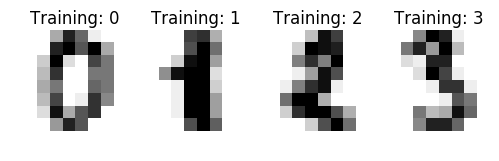

In [14]:
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

We will split the data into training and test sets, the model will be trained on the training data and we will use test data to compute the accuracy of our model.

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.7, random_state=0)


In [16]:
train_X.shape

(1257, 64)

In [17]:
test_X.shape

(540, 64)

Now we will build a classifier based on neural network using Keras. 

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [19]:
np.random.seed(1234)

In [20]:
def one_hot_encode_object_array(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [21]:
# One hot encode labels for training and test sets.
train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [22]:
# Initialize a Sequential neural network.
model = Sequential()

In [23]:
# Add a fully connected layer with 32 units. Each unit recieves an input from every unit in the input layer, and since number of units in the input is equal to the dimension (64) of the input vectors, we need the input shape to be 64.
# Keras uses Dense to create a fully connected layer.
model.add(Dense(32, input_shape=(64,)))

In [24]:
# Add an activation after the first layer. We will use sigmoid activation, which is DEFN. Other choices like relu etc are also possible.
model.add(Activation('sigmoid'))

In [25]:
# Add output layer, which is always fully connected. Since the output will be OHE labels, which are 10 dimensions, we would want the output layer to have 10 units.
model.add(Dense(10))

In [26]:
# Add activation for the output layer. In classification tasks, we use softmax activation, which is -- DEFN--. This provides a probilistic interpretation for the output labels...more details..
model.add(Activation('softmax'))

In [27]:
# Next we need to configure the model. There are some more choices we need to make before we can run the model.
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer
# loss
# metrics

In [28]:
# Train the network. fit method, similar to sklearn.
model.fit(train_X, train_y_ohe, nb_epoch=10, batch_size=30)
# nb_epoch, batch_size

Epoch 1/10
1257/1257 [==============================] - 0s - loss: 2.1190 - acc: 0.2824     
Epoch 2/10
1257/1257 [==============================] - 0s - loss: 1.6542 - acc: 0.5887     
Epoch 3/10
1257/1257 [==============================] - 0s - loss: 1.3443 - acc: 0.7741     
Epoch 4/10
1257/1257 [==============================] - 0s - loss: 1.1166 - acc: 0.8401     
Epoch 5/10
1257/1257 [==============================] - 0s - loss: 0.9462 - acc: 0.8767     
Epoch 6/10
1257/1257 [==============================] - 0s - loss: 0.8080 - acc: 0.8958     
Epoch 7/10
1257/1257 [==============================] - 0s - loss: 0.6874 - acc: 0.9117     
Epoch 8/10
1257/1257 [==============================] - 0s - loss: 0.5867 - acc: 0.9228     
Epoch 9/10
1257/1257 [==============================] - 0s - loss: 0.5043 - acc: 0.9324     
Epoch 10/10
1257/1257 [==============================] - 0s - loss: 0.4353 - acc: 0.9419     


In [29]:
# Compute accuracy of the model based on this network.
loss, accuracy = model.evaluate(test_X, test_y_ohe)
accuracy

512/540 [===========================>..] - ETA: 0s

0.92592592680895769